In [67]:
cd e:/BNUCloud/work/git/Scripts/snr14/

e:\BNUCloud\work\git\Scripts\snr14


In [2]:
from dis_ext import *

import _pickle

In [48]:
#读取遗迹原始数据
name = 'snr169'
stardata = readsav(pjoin('..', '..', 'Data', 'extin3d', 'discalib', 'result', '{0}.sav'.format(name)), python_dict = True)

stardata = stardata['res']

In [51]:
#读取遗迹3d数据
data_file = pjoin('..', '..', 'Data', 'extin3d', '{0}extin3d015.sav'.format(name))
res=readsav(data_file, python_dict=True)
res=res['exta']

ar=res.dar[0].dar
allar = np.reshape(np.vstack(ar), (len(ar), ar[0].shape[0], ar[0].shape[1]))

allar = np.ma.masked_where(allar<-999,allar)

In [108]:
#距离模数bin
dismo=res.dis[0]#distant modulu

In [56]:
#构造网格坐标
ll, bb = np.meshgrid(res.gl[0], res.gb[0])

lbpairs = np.vstack([ll.reshape(-1), bb.reshape(-1) ]).T

In [71]:
#读取圈画范围的边界
pointsfile_path = pjoin('..', '..', 'Data', 'extin3d', 'results', '{0}_points.pkl'.format(name))
pointsfile = open(pointsfile_path, 'rb')#if there is a file, load it
points = _pickle.load(pointsfile)
pointsfile.close()
p = path.Path(points)

In [72]:
#边界内网格的的索引
index=p.contains_points(lbpairs)

rowix = index.reshape(ll.shape).nonzero()[0]
colix = index.reshape(ll.shape).nonzero()[1]

In [148]:
#边界内的网格中的消光数据
extinction = allar[:,rowix, colix ]

In [151]:
#单位距离内的消光
mbin = dismo[1] - dismo[0]
dbin = moddis(dismo + mbin/2.) - moddis(dismo - mbin/2.)

extinctionpc = extinction/dbin[:,None]

In [179]:
from matplotlib.ticker import MultipleLocator, FormatStrFormatter  

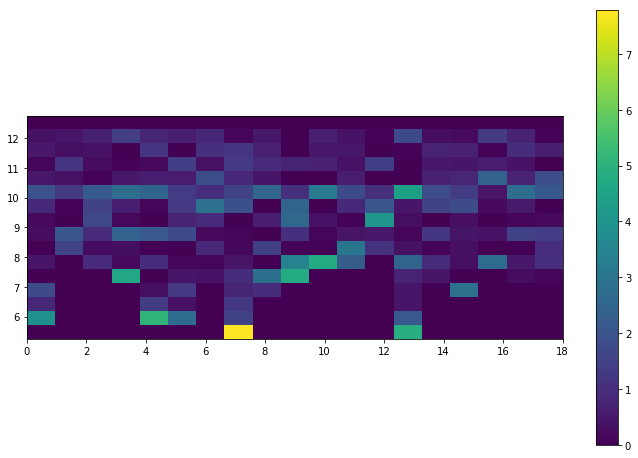

In [192]:
fig= plt.figure(figsize=(12,8))
ax=fig.add_subplot(111)
extent=[0,18,5.25,12.75]
myplot=ax.imshow(extinctionpc,origin = 'lower',interpolation='none',extent=extent)
fig.colorbar(myplot)


plt.show()

In [195]:
moddis(10.75)

1.412537544622754

In [137]:
np.percentile(allar[:,rowix, colix],100)

1.1443800926208496